In [1]:
import os
import sys
import zarr
module_path = '/home/unitree/桌面/umi2lerobot'  # 替换为实际路径
sys.path.append(module_path)
from imagecodecs_numcodecs import register_codecs, JpegXl
# 临时重定向 stderr 来抑制注册信息
old_stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')

try:
    register_codecs()
finally:
    sys.stderr.close()
    sys.stderr = old_stderr
root = zarr.open('/home/unitree/桌面/umi2lerobot/rawData/ManipForce/Battery_disassembly.zarr')
print(root.tree())

print(root['meta']["episode_ends"][:])

/
 ├── data
 │   ├── action (26425, 8) float32
 │   ├── ft_data (255132, 6) float32
 │   ├── ft_timestamps (255132,) float64
 │   ├── handeye_cam_1 (26425, 800, 1280, 3) uint8
 │   ├── handeye_cam_2 (26425, 480, 640, 3) uint8
 │   ├── img_timestamps (26425,) float64
 │   ├── pose_wrt_start (26425, 7) float32
 │   └── state (26425, 7) float32
 └── meta
     ├── episode_ends (108,) int64
     ├── episode_ft_ends (108,) int64
     └── episode_img_ends (108,) int64
[  301   531   718   927  1149  1383  1620  1824  2046  2248  2438  2665
  2884  3119  3331  3544  3786  4032  4249  4492  4824  5066  5297  5513
  5815  6029  6254  6473  6720  6973  7222  7582  7833  8127  8349  8621
  8831  9048  9306  9545  9765 10062 10325 10547 10780 11003 11210 11418
 11617 11859 12099 12319 12490 12776 13006 13251 13503 13759 14036 14405
 14665 14939 15165 15429 15706 15918 16133 16384 16621 16892 17196 17417
 17692 18012 18240 18535 18797 19066 19329 19578 19828 20060 20310 20574
 20841 21310 21500 2169

In [3]:
print(root['meta']["episode_ft_ends"][:10])
print(root['meta']["episode_img_ends"][:10])

[ 3076  5222  7121  9256 11521 13909 16271 17593 19863 21907]
[ 301  531  718  927 1149 1383 1620 1824 2046 2248]


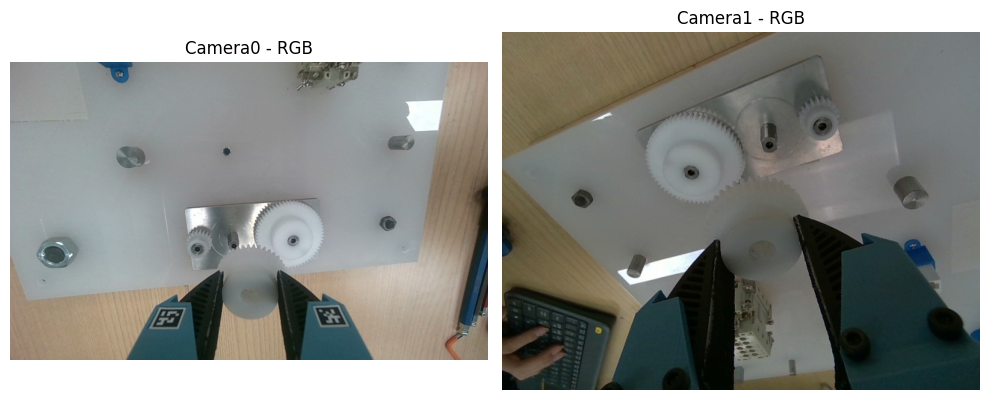

In [ ]:
import matplotlib.pyplot as plt

step = 0
cam0 = root['data']['handeye_cam_1'][step]
cam1 = root['data']['handeye_cam_2'][step]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cam0)
axes[0].set_title('Camera0 - RGB')
axes[0].axis('off')
axes[1].imshow(cam1)
axes[1].set_title('Camera1 - RGB')
axes[1].axis('off')
plt.tight_layout()
plt.show()